In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchvision

from time import time
from torch import nn, optim
from torchvision import datasets, transforms
from tqdm import tqdm

import os, sys

In [2]:
def fix_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    


In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

In [4]:
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
valset   = datasets.MNIST('./data', download=True, train=False, transform=transform)

torch.Size([64, 1, 28, 28])
torch.Size([64])


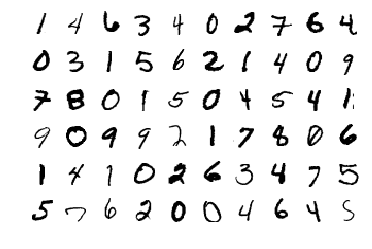

In [5]:
bs = 64
fix_seed(42)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True)
valloader   = torch.utils.data.DataLoader(valset, batch_size=bs, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
input_size   = 784
hidden_sizes = [128, 64]
output_size  = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0], bias = False),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1], bias = False),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size, bias = False),
                      nn.LogSoftmax(dim=1))

device = torch.device('cuda', 0)
model  = model.to(device)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=False)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=False)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=False)
  (5): LogSoftmax()
)


In [43]:
def test():
    correct_count, all_count = 0.0, 0

    for batch, (images, labels) in enumerate(tqdm(valloader)):
        mbs    = images.shape[0]
        images = images.view(mbs, -1)
        with torch.no_grad():
            logZ = model(images.to(device))
            Z    = torch.exp(logZ)
            Z    = torch.argmax(Z, dim=1)

            correct_count += torch.sum(Z == labels.to(device))
            all_count     += mbs
            
    return correct_count, all_count

In [53]:
input_size   = 784
# hidden_sizes = [128, 64]
output_size  = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0], bias = False),
                      nn.ReLU(),
                      # nn.Linear(hidden_sizes[0], hidden_sizes[1], bias = False),
                      # nn.ReLU(),
                      # nn.Linear(hidden_sizes[1], output_size, bias = False),
                      nn.Linear(hidden_sizes[0], output_size, bias = False),
                      nn.LogSoftmax(dim=1))

device = torch.device('cuda', 0)
model  = model.to(device)
print(model)

loss_fn    = nn.NLLLoss()
optimizer  = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs     = 10

t_0 = time()
for epoch in range(epochs):
    total_loss, total_samples = 0, 0
    for batch, (images, labels) in enumerate(tqdm(trainloader)):
        mbs    = images.shape[0]
        
        images = images.view(mbs, -1) # flatten images
        
        # Forward Pass
        output = model(images.to(device))
        
        # Backward Pass
        optimizer.zero_grad()
        loss = loss_fn(output, labels.to(device))
        loss.backward()
        optimizer.step()
        total_loss += mbs * loss
        total_samples += mbs
        
    correct_count, all_count = test()
    print('Epoch {}/{}: Training Loss: {:.5f}, Testing Accuracy: {:.2f} ({}/{})'.format(epoch+1,
                                                                                        epochs,
                                                                                        total_loss/total_samples,
                                                                                        100 * correct_count/all_count,
                                                                                        int(correct_count),
                                                                                        all_count))
print('Total Training Time: {} minutes'.format((time()-t_0)/60))

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=False)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=False)
  (3): LogSoftmax()
)


100%|██████████| 157/157 [00:01<00:00, 152.39it/s]


Epoch 1/10: Training Loss: 0.51786, Testing Accuracy: 91.23 (9123/10000)


100%|██████████| 157/157 [00:01<00:00, 152.77it/s]


Epoch 2/10: Training Loss: 0.28707, Testing Accuracy: 92.89 (9289/10000)


100%|██████████| 157/157 [00:01<00:00, 146.70it/s]


Epoch 3/10: Training Loss: 0.23175, Testing Accuracy: 94.16 (9416/10000)


100%|██████████| 157/157 [00:01<00:00, 146.90it/s]


Epoch 4/10: Training Loss: 0.19331, Testing Accuracy: 94.80 (9480/10000)


100%|██████████| 157/157 [00:01<00:00, 147.33it/s]


Epoch 5/10: Training Loss: 0.16713, Testing Accuracy: 95.52 (9552/10000)


100%|██████████| 157/157 [00:01<00:00, 147.07it/s]


Epoch 6/10: Training Loss: 0.14571, Testing Accuracy: 95.91 (9591/10000)


100%|██████████| 157/157 [00:01<00:00, 147.91it/s]


Epoch 7/10: Training Loss: 0.12974, Testing Accuracy: 96.07 (9607/10000)


100%|██████████| 157/157 [00:01<00:00, 148.43it/s]


Epoch 8/10: Training Loss: 0.11754, Testing Accuracy: 96.13 (9613/10000)


100%|██████████| 157/157 [00:01<00:00, 116.77it/s]


Epoch 9/10: Training Loss: 0.10731, Testing Accuracy: 96.54 (9654/10000)


100%|██████████| 157/157 [00:01<00:00, 147.64it/s]

Epoch 10/10: Training Loss: 0.09868, Testing Accuracy: 96.79 (9679/10000)
Total Training Time: 1.4041927019755045 minutes


In [82]:
weights = []

for param in model.parameters():
    weights.append(param.cpu().detach().numpy())
    
torch.save(weights, './saved_models/weights.pt')

In [83]:
torch.load('./saved_models/weights.pt')

[array([[-0.03543454,  0.01168417, -0.00386478, ...,  0.00891849,
          0.0263311 ,  0.02705251],
        [ 0.03283396,  0.0103294 ,  0.01316472, ...,  0.02206131,
         -0.00391519, -0.00392418],
        [ 0.0163173 , -0.01782429, -0.02326529, ..., -0.01099012,
          0.03701517, -0.01298323],
        ...,
        [ 0.02287204,  0.02574121,  0.00609069, ..., -0.02177605,
          0.00742608, -0.03516927],
        [-0.01405415,  0.0228174 , -0.0379351 , ..., -0.02563522,
          0.02348035, -0.03488194],
        [-0.03694836,  0.00530641,  0.00835346, ..., -0.01715262,
         -0.04158386, -0.00794854]], dtype=float32),
 array([[-0.42014545,  0.01246229, -0.08176486, ..., -0.13358444,
          0.11982322, -0.32430094],
        [-0.21430323, -0.08422168,  0.12040454, ...,  0.03644599,
         -0.21391407, -0.04804456],
        [-0.27576298,  0.1311363 ,  0.1319465 , ...,  0.20128493,
         -0.15161633, -0.11823063],
        ...,
        [-0.03082046, -0.24336539,  0.3